# EDA

### Import Libraries and Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../01_data/cleaned_data/school_df_v6.csv')

In [3]:
df.drop(columns=['Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 
                 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 
                 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 
                 'Unnamed: 54', 'Unnamed: 55',], inplace=True)
df = df.iloc[:,:45]
df.dropna(how='all', inplace=True)

In [4]:
df.shape

(109, 45)

In [5]:
df.head(1)

,code,name,grade_band,enrollment_SY1718,enrollment_SY1819,star_score_SY1718,star_score_SY1819,star_rating_SY1718,star_rating_SY1819,capacity_SY1718,...,count_20+_SY1718,pct_20+_SY1718,budgeted_amount_FY16,budgeted_enrollment_FY16,budgeted_amount_FY17,budgeted_enrollment_FY17,pct_meet_exceed_math_SY1718,pct_meet_exceed_ela_SY1718,pct_meet_exceed_math_SY1819,pct_meet_exceed_ela_SY1819
0,175.0,School-Within-School @ Goding,Elementary,308.0,313.0,88.55,88.26,5.0,5.0,444.0,...,0.0,0.0,10592800.0,5880.0,3815456.0,2674740.0,0.765,0.765,0.743,0.752


### Inspect the Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 108
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         109 non-null    float64
 1   name                         109 non-null    object 
 2   grade_band                   109 non-null    object 
 3   enrollment_SY1718            109 non-null    float64
 4   enrollment_SY1819            109 non-null    float64
 5   star_score_SY1718            109 non-null    float64
 6   star_score_SY1819            109 non-null    float64
 7   star_rating_SY1718           109 non-null    float64
 8   star_rating_SY1819           109 non-null    float64
 9   capacity_SY1718              109 non-null    float64
 10  capacity_SY1819              109 non-null    float64
 11  latitude                     109 non-null    float64
 12  longitude                    109 non-null    float64
 13  cluster             

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
code,109.0,3.308991e+02,9.726928e+01,175.000000,2.620000e+02,3.150000e+02,4.070000e+02,8.840000e+02
enrollment_SY1718,109.0,4.262294e+02,2.413354e+02,132.000000,3.000000e+02,3.740000e+02,4.790000e+02,1.829000e+03
enrollment_SY1819,109.0,4.290459e+02,2.371943e+02,136.000000,2.950000e+02,3.660000e+02,4.800000e+02,1.796000e+03
star_score_SY1718,109.0,4.702202e+01,2.532249e+01,-1.000000,2.657000e+01,4.535000e+01,6.646000e+01,9.901000e+01
star_score_SY1819,109.0,4.921615e+01,2.527997e+01,-1.000000,2.862000e+01,5.077000e+01,6.995000e+01,9.867000e+01
star_rating_SY1718,109.0,2.816514e+00,1.306431e+00,-1.000000,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
star_rating_SY1819,109.0,2.954128e+00,1.363447e+00,-1.000000,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
capacity_SY1718,109.0,5.484954e+02,2.860278e+02,-1.000000,3.980000e+02,4.850000e+02,6.090000e+02,1.840000e+03
capacity_SY1819,109.0,5.503303e+02,2.854613e+02,-1.000000,4.000000e+02,4.890000e+02,6.090000e+02,1.840000e+03
latitude,109.0,3.890553e+01,3.517412e-02,38.826966,3.888480e+01,3.890419e+01,3.892954e+01,3.898460e+01


In [8]:
# sns.pairplot(df, corner=True)

##### Null Values

In [9]:
df.isnull().sum()
# null values in:
# count_1-5_SY1819, count_6-10_SY1819, count_20+_SY1819, 
# count_1-5_SY1718, count_6-10_SY1718, count_11-20_SY1718, count_20+_SY1718, 

code                           0
name                           0
grade_band                     0
enrollment_SY1718              0
enrollment_SY1819              0
star_score_SY1718              0
star_score_SY1819              0
star_rating_SY1718             0
star_rating_SY1819             0
capacity_SY1718                0
capacity_SY1819                0
latitude                       0
longitude                      0
cluster                        0
ward                           0
count_any_SY1819               0
count_0_SY1819                 0
pct_0_SY1819                   0
count_1-5_SY1819               2
pct_1-5_SY1819                 0
count_6-10_SY1819              2
pct_6-10_SY1819                0
count_11-20_SY1819             2
pct_11-20_SY1819               0
count_20+_SY1819               1
pct_20+_SY1819                 0
count_any_SY1718               0
count_0_SY1718                 0
pct_0_SY1718                   0
count_1-5_SY1718               2
pct_1-5_SY

### Target is Star Rating

In [10]:
#2018-2019
df['star_rating_SY1819'].value_counts()

 4.0    35
 2.0    26
 3.0    19
 1.0    15
 5.0    12
-1.0     2
Name: star_rating_SY1819, dtype: int64

In [11]:
#2017-2018
df['star_rating_SY1718'].value_counts(normalize=True)
# base model will be 32%
#note values with -1 as target

 3.0    0.321101
 2.0    0.256881
 4.0    0.146789
 1.0    0.128440
 5.0    0.128440
-1.0    0.018349
Name: star_rating_SY1718, dtype: float64

### Visulize the data

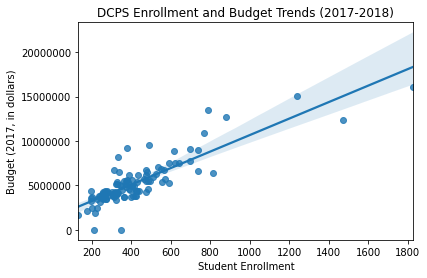

In [12]:
sns.regplot(x='enrollment_SY1718', y='budgeted_amount_FY17', data=df)
plt.xlabel('Student Enrollment')
plt.ylabel('Budget (2017, in dollars)')
plt.title('DCPS Enrollment and Budget Trends (2017-2018)')
plt.ticklabel_format(style='plain', axis='y');
# plt.savefig('./figures/scatter_enrollment_budget.png');

In [13]:
#negative values used in modeling, for visualizations negative values removed
df_non_negative = df[['pct_meet_exceed_math_SY1718', 'pct_meet_exceed_ela_SY1718',
                    'pct_meet_exceed_math_SY1819', 'pct_meet_exceed_ela_SY1819', 
                      'star_rating_SY1718', 'star_rating_SY1819', 'budgeted_amount_FY17']]
df_non_negative = df_non_negative[df_non_negative['pct_meet_exceed_math_SY1718'] != -1]
df_non_negative = df_non_negative[df_non_negative['pct_meet_exceed_math_SY1819'] != -1]
df_non_negative = df_non_negative[df_non_negative['pct_meet_exceed_ela_SY1819'] != -1]
df_non_negative = df_non_negative[df_non_negative['star_rating_SY1718'] != -1]
df_non_negative = df_non_negative[df_non_negative['star_rating_SY1819'] != -1]
df_non_negative = df_non_negative[df_non_negative['budgeted_amount_FY17'] != -1]

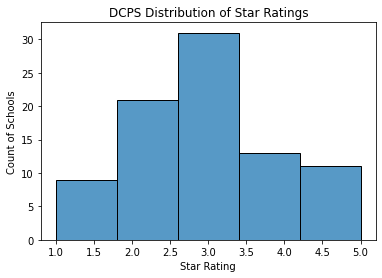

In [14]:
sns.histplot(df_non_negative['star_rating_SY1718'], bins=5)
plt.xlabel('Star Rating')
plt.ylabel('Count of Schools')
plt.title('DCPS Distribution of Star Ratings');
# plt.savefig('./figures/hist_star_rating.png');

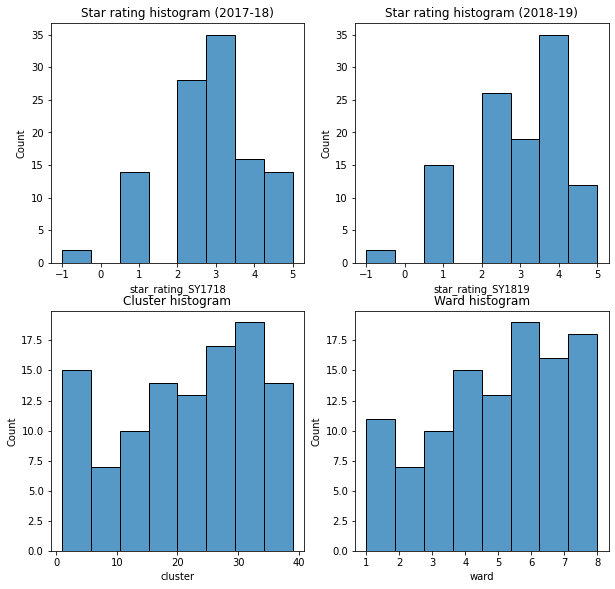

In [15]:
fig = plt.figure(figsize=(10, 15))

ax = fig.add_subplot(3, 2, 1)
sns.histplot(df['star_rating_SY1718'], ax=ax)
plt.title('Star rating histogram (2017-18)')

ax = fig.add_subplot(3, 2, 2)
sns.histplot(df['star_rating_SY1819'], ax=ax)
plt.title('Star rating histogram (2018-19)')

ax = fig.add_subplot(3, 2, 3)
sns.histplot(df['cluster'], ax=ax)
plt.title('Cluster histogram')

ax = fig.add_subplot(3, 2, 4)
sns.histplot(df['ward'], ax=ax)
plt.title('Ward histogram');

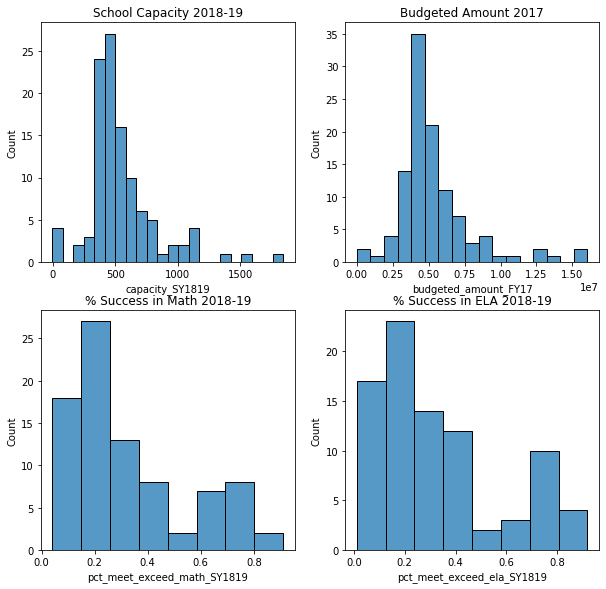

In [16]:
fig = plt.figure(figsize=(10, 15))

ax = fig.add_subplot(3, 2, 1)
sns.histplot(df['capacity_SY1819'], ax=ax)
plt.title('School Capacity 2018-19')

ax = fig.add_subplot(3, 2, 2)
sns.histplot(df['budgeted_amount_FY17'], ax=ax)
plt.title('Budgeted Amount 2017')

ax = fig.add_subplot(3, 2, 3)
sns.histplot(df_non_negative['pct_meet_exceed_math_SY1819'], ax=ax)
plt.title('% Success in Math 2018-19')

ax = fig.add_subplot(3, 2, 4)
sns.histplot(df_non_negative['pct_meet_exceed_ela_SY1819'], ax=ax)
plt.title('% Success in ELA 2018-19');

### EDA on Target (star rating)

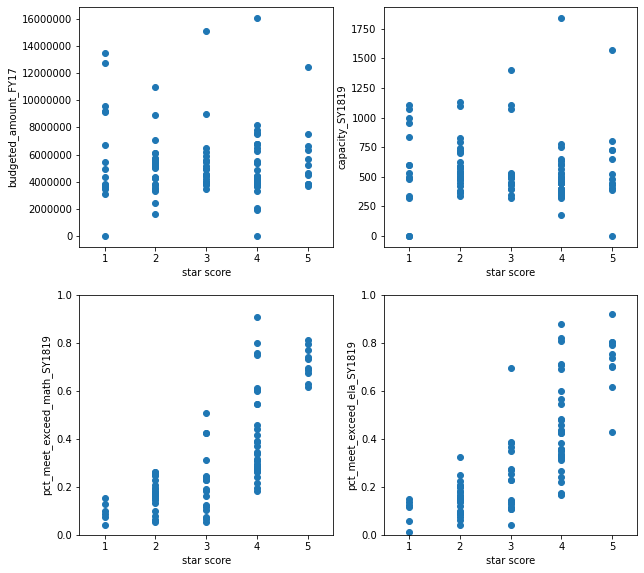

In [17]:
fig = plt.figure(figsize=(10, 15))

ax = fig.add_subplot(3, 2, 1)
plt.scatter(df['star_rating_SY1819'], df['budgeted_amount_FY17'])
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('budgeted_amount_FY17')
plt.xlabel('star score')
plt.xlim(0.5,5.5)
ax = fig.add_subplot(3, 2, 2)
plt.scatter(df['star_rating_SY1819'], df['capacity_SY1819'])
plt.ylabel('capacity_SY1819')
plt.xlabel('star score')
plt.xlim(0.5,5.5)
ax = fig.add_subplot(3, 2, 3)
plt.scatter(df['star_rating_SY1819'], df['pct_meet_exceed_math_SY1819'])
plt.ylabel('pct_meet_exceed_math_SY1819')
plt.xlabel('star score')
plt.ylim(0,1)
plt.xlim(0.5,5.5)
ax = fig.add_subplot(3, 2, 4)
plt.scatter(df['star_rating_SY1819'], df['pct_meet_exceed_ela_SY1819'])
plt.ylabel('pct_meet_exceed_ela_SY1819')
plt.xlabel('star score')
plt.ylim(0,1)
plt.xlim(0.5,5.5);
# plt.savefig('./figures/scatter_target_charts.png');

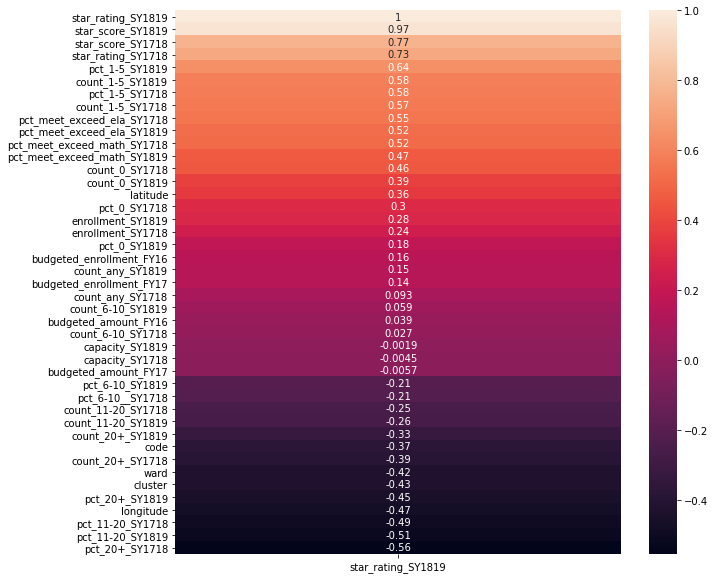

In [18]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df.corr()[['star_rating_SY1819']].sort_values(by='star_rating_SY1819', ascending=False), annot=True);

### Cluster Data EDA
##### Data for app to show cluster data

In [19]:
graph_df = df[df['star_rating_SY1819']!= -1]
test = graph_df.groupby('cluster')
cluster_star_df = pd.DataFrame(test['star_rating_SY1819'].agg(np.mean))

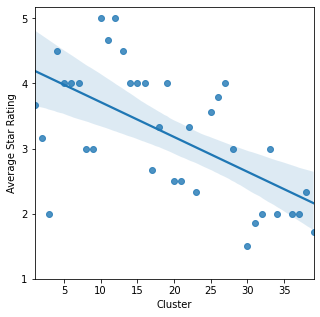

In [20]:
fig = plt.figure(figsize=(5,5))
sns.regplot(x=cluster_star_df.index, y='star_rating_SY1819', data=cluster_star_df)
plt.ylabel('Average Star Rating')
plt.xlabel('Cluster')
plt.yticks([1, 2, 3, 4, 5])
plt.ticklabel_format(style='plain', axis='y');
# plt.savefig('./figures/scatter_star_by_cluster.png');

In [21]:
cluster_group_df = pd.DataFrame(df.groupby('cluster').agg(np.mean))
cluster_group_df.head(2)

,code,enrollment_SY1718,enrollment_SY1819,star_score_SY1718,star_score_SY1819,star_rating_SY1718,star_rating_SY1819,capacity_SY1718,capacity_SY1819,latitude,...,count_20+_SY1718,pct_20+_SY1718,budgeted_amount_FY16,budgeted_enrollment_FY16,budgeted_amount_FY17,budgeted_enrollment_FY17,pct_meet_exceed_math_SY1718,pct_meet_exceed_ela_SY1718,pct_meet_exceed_math_SY1819,pct_meet_exceed_ela_SY1819
cluster,,,,,,,,,,,,,,,,,,,,,
1.0,237.333333,392.666667,389.000000,78.413333,65.996667,4.666667,3.666667,425.000000,425.000000,38.920122,...,12.000000,0.019580,7.174753e+06,2629.666667,3.665543e+06,2.374440e+06,0.013667,-0.082,-0.010667,-0.064667
2.0,362.333333,639.666667,649.833333,62.191667,56.668333,3.500000,3.166667,780.333333,780.333333,38.926998,...,92.333333,0.105604,1.622428e+07,6666.666667,8.391504e+06,4.962141e+06,0.009167,0.050,-0.019000,0.051500


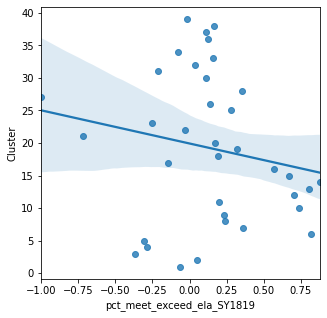

In [22]:
fig = plt.figure(figsize=(5,5))
sns.regplot(y=cluster_star_df.index, x='pct_meet_exceed_ela_SY1819', data=cluster_group_df)
plt.xlabel('pct_meet_exceed_ela_SY1819')
plt.ylabel('Cluster')
# plt.xticks([1.5, 2, 3, 4, 5])
plt.ticklabel_format(style='plain', axis='y');
# plt.savefig('./figures/scatter_star_by_cluster.png');